# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATED THIS LINK** https://github.com/Vanessa-Salgado/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

In [ ]:
### ===== FINAL CODE =====

## Import libraries and functions

In [37]:
# import libraries and functions here
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rioxr
# this is our first time using this function
from shapely.geometry import box, Point

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# set pandas to display all columns
pd.set_option('display.max_columns', None)

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

In [17]:
# 1
# load tif file
lulc_fp = os.path.join(os.getcwd(),'data','land_cover.tif')
lulc = rioxr.open_rasterio(lulc_fp)


xarray.core.coordinates.DataArrayCoordinates

In [19]:
# view information on raster file
print(f"dimensions: {lulc.dims}\n {lulc.coords}\n crs: {lulc.rio.crs}") #summary

dimensions: ('band', 'y', 'x')
 Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -1.941e+06 -1.941e+06
  * y            (y) float64 1.762e+06 1.762e+06 ... 1.672e+06 1.672e+06
    spatial_ref  int64 0
 crs: EPSG:5070


In [5]:
# 2
ca = gpd.read_file("https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip")

In [6]:
ca

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-13317677.375 3930590.808, -13..."


## Bounding box
Create a `geopands.GeoDataFrame` named `bbox` with the lulc bounding box. 

In [24]:
# create geo-dataframe from bounding box
lulc_bbox = lulc.rio.bounds()

bbox = gpd.GeoDataFrame(geometry = [box(*lulc_bbox)],
                       crs = 'EPSG:5070') # assign CRS

In [30]:
# check bbox and lulc have same crs
print(f'Do lulc and bbox have same CRS: \n {bbox.crs == lulc.rio.crs}')


Do lulc and bbox have same CRS: 
 True


<Axes: >

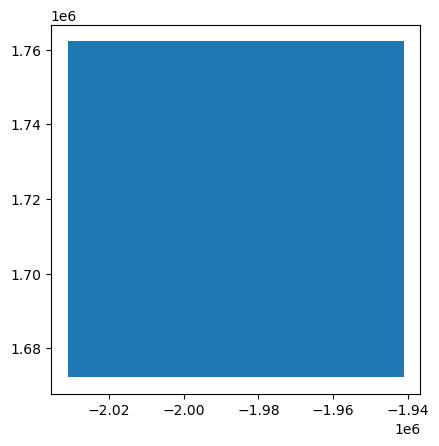

In [33]:
bbox.plot()

## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

In [40]:
# your code here
mt_whitney = gpd.GeoDataFrame(geometry = [Point(-118.1731, 36.3443)],
                             crs = 'EPSG:5070')
mt_whitney

,geometry
0,POINT (-118.173 36.344)


## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

<Axes: >

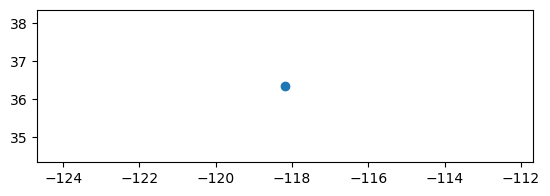

In [43]:
# 
mt_whitney.plot()

## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

TypeError: 'GeoDataFrame' object is not callable

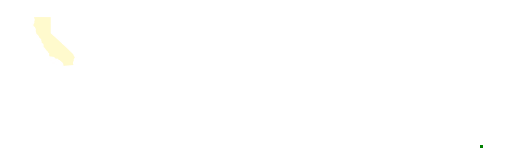

In [54]:
#
fig, ax = plt.subplots()

ax.axis('off')

ca.plot(ax = ax, color = 'lemonchiffon', edgecolor = '1.0')

bbox.plot(ax = ax, color = 'green')

mt_whitney(ax = ax, color = 'red', marker = '^')

plt.show()

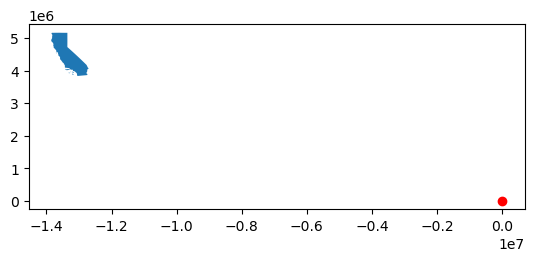

In [53]:
# plot populated places in Alaska
fig, ax = plt.subplots(figuresize = )

ca.plot(ax=ax)
mt_whitney.plot(ax=ax, color='red')

plt.show()

## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
